# Double Last FQI Radial 10m

In [1]:
%load_ext autoreload
%aimport os, pickle, pandas, numpy
%autoreload 2

In [2]:
import os
import pickle
import pandas as pd
import numpy as np

pd.options.display.max_columns = None

In [3]:
from fqi.result_plot import *
from fqi.utils import *

In [4]:
%matplotlib inline

In [5]:
sim_file_name = 'ds_with_last_budapest_10.csv'
track_in_file_name = 'budapest_InnerTrackEdge.csv'
track_out_file_name = 'budapest_OuterTrackEdge.csv'

In [6]:
simulation = pd.read_csv(os.path.join(data_path, sim_file_name), dtype={'isReference': bool})
track_in = pd.read_csv(os.path.join(data_path, track_in_file_name))
track_out = pd.read_csv(os.path.join(data_path, track_out_file_name))

In [7]:
simulation

NLap  time  isReference  is_partial  xCarWorld  yCarWorld  nYawBody  \
0         1   0.1        False           0   493.0193  -34.37362 -0.036698   
1         1   0.2        False           0   488.1724  -40.08960 -0.028991   
2         1   0.3        False           0   483.3096  -45.85862 -0.021114   
3         1   0.4        False           0   478.4296  -51.67754 -0.033546   
4         1   0.5        False           0   473.5356  -57.54678 -0.026170   
5         1   0.6        False           0   468.6298  -63.46545 -0.023222   
6         1   0.7        False           0   463.7112  -69.43072 -0.025436   
7         1   0.8        False           0   458.7805  -75.44118 -0.017066   
8         1   0.9        False           0   453.8369  -81.49455 -0.011775   
9         1   1.0        False           0   448.8783  -87.58657 -0.007940   
10        1   1.1        False           0   443.9016  -93.71316  0.015045   
11        1   1.2        False           0   438.9007  -99.86797  0.003161   
12        1   1.3        False           0   433.8741 -106.04830 -0.015913   
13        1   1.4        False           0   428.8268 -112.25830  0.006976   
14        1   1.5        False           0   423.7584 -118.49590  0.012470   
15        1   1.6        False           0   418.6653 -124.75580 -0.004701   
16        1   1.7        False           0   413.5497 -131.03970  0.004371   
17        1   1.8        False           0   408.4128 -137.34710  0.015350   
18        1   1.9        False           0   403.2519 -143.67500 -0.005176   
19        1   2.0        False           0   398.0688 -150.02400  0.004503   
20        1   2.1        False           0   392.8653 -156.39440  0.011304   
21        1   2.2        False           0   387.6391 -162.78270 -0.000934   
22        1   2.3        False           0   382.3931 -169.19080 -0.009353   
23        1   2.4        False           0   377.1319 -175.62090  0.007179   
24        1   2.5        False           0   371.8539 -182.07090  0.005022   
25        1   2.6        False           0   366.5581 -188.53870 -0.012436   
26        1   2.7        False           0   361.2484 -195.02620  0.007268   
27        1   2.8        False           0   355.9242 -201.53250  0.002095   
28        1   2.9        False           0   350.5848 -208.05560 -0.012770   
29        1   3.0        False           0   345.2325 -214.59590  0.026180   
...     ...   ...          ...         ...        ...        ...       ...   
40708    56  19.2        False           1    28.3202 -470.79630  0.352207   
40709    56  19.3        False           1    28.3202 -470.79630  0.352207   
40710    56  19.4        False           1    28.3202 -470.79630  0.352207   
40711    56  19.5        False           1    28.3202 -470.79630  0.352207   
40712    56  19.6        False           1    28.3202 -470.79630  0.352207   
40713    56  19.7        False           1    28.3202 -470.79630  0.352207   
40714    56  19.8        False           1    28.3202 -470.79630  0.352207   
40715    56  19.9        False           1    28.3202 -470.79630  0.352207   
40716    56  20.0        False           1    28.3202 -470.79630  0.352207   
40717    56  20.1        False           1    28.3202 -470.79630  0.352207   
40718    56  20.2        False           1    28.3202 -470.79630  0.352207   
40719    56  20.3        False           1    28.3202 -470.79630  0.352207   
40720    56  20.4        False           1    28.3202 -470.79630  0.352207   
40721    56  20.5        False           1    28.3202 -470.79630  0.352207   
40722    56  20.6        False           1    28.3202 -470.79630  0.352207   
40723    56  20.7        False           1    28.3202 -470.79630  0.352207   
40724    56  20.8        False           1    28.3202 -470.79630  0.352207   
40725    56  20.9        False           1    28.3202 -470.79630  0.352207   
40726    56  21.0        False           1    28.3202 -470.79630  0.352207   
40727    56  21.1        Fals

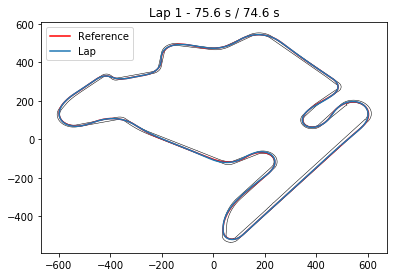

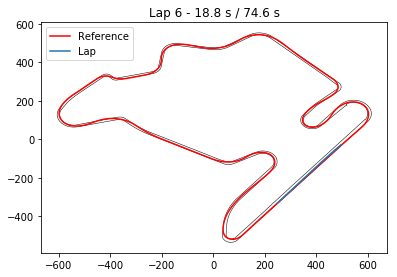

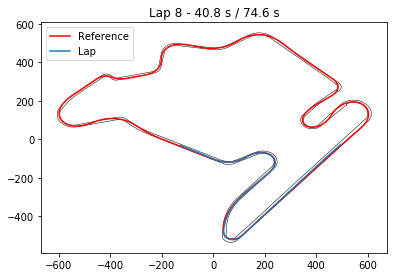

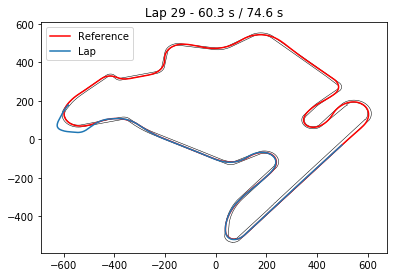

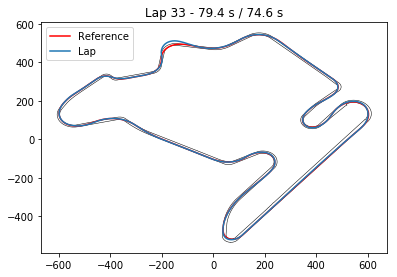

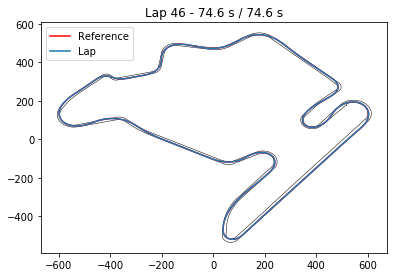

In [8]:
laps_to_analyse = [1, 6, 8, 29, 33, 46]
for lap in laps_to_analyse:
    f, ax = plot_track(track_in, track_out)
    plot_trajectories(simulation, lap, f, ax, simulation[simulation.NLap == 46])

# All state features

In [9]:
all_state_cols = ['xCarWorld', 'yCarWorld', 'positionReferenceX', 'positionReferenceY',
              'nYawBody', 'nEngine', 'NGear', 'positionRho',
              'positionTheta', 'positionLeft', 'positionRight',
              'positionRelativeX', 'positionRelativeY', 'actualCurvature', 'referenceCurvature',
              'actualSpeedModule', 'referenceSpeedAngle', 'speedDifferenceVectorModule',
              'speedDifferenceOfModules', 'actualAccelerationModule', 'referenceAccelerationAngle',
              'accelerationDifferenceVectorModule', 'accelerationDifferenceOfModules',
                 'actualAccelerationX', 'actualAccelerationY'] + prev_action_cols

In [10]:
eval_file_name_as = 'eval_alg_double_fqi_last_nofilt.pkl'
algorithm_name_as = 'alg_double_fqi_last_nofilt.pkl'

In [11]:
with open(os.path.join(fqi_exp_path, eval_file_name_as), 'rb') as e:
    evaluation_as = pickle.load(e)

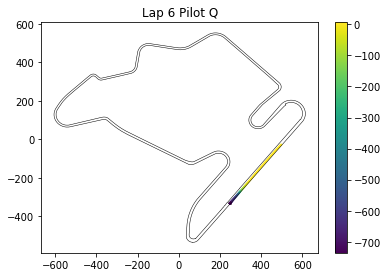

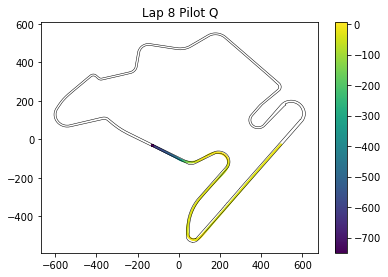

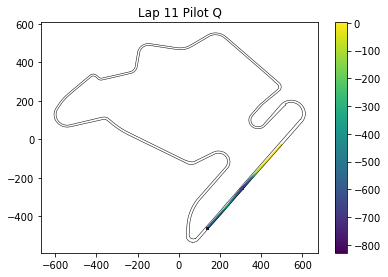

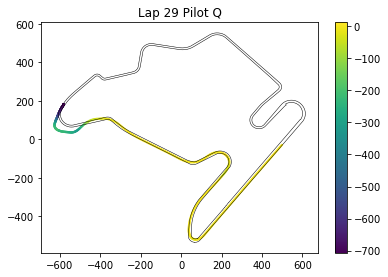

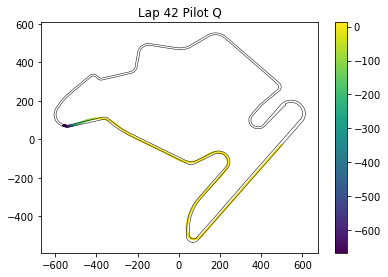

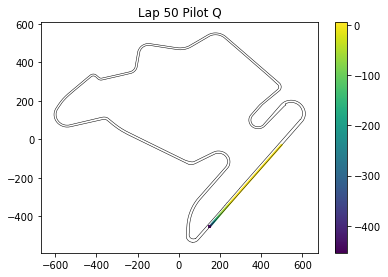

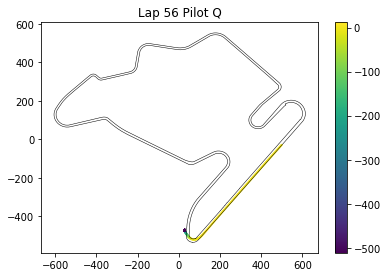

In [13]:
laps = list(evaluation_as.keys())
for lap in [6, 8, 11, 29, 42, 50, 56]:
    f, ax = plot_track(track_in, track_out)
    plot_q(lap, simulation, evaluation_as, f, ax, 'pilot')
    

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


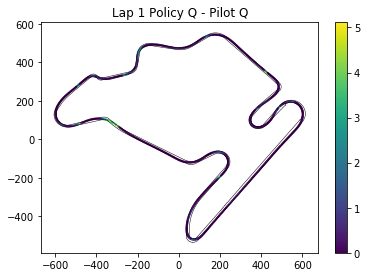

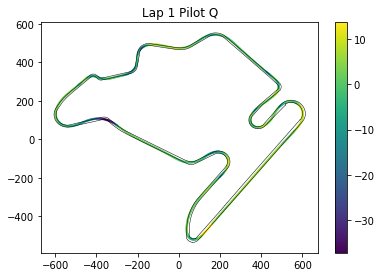

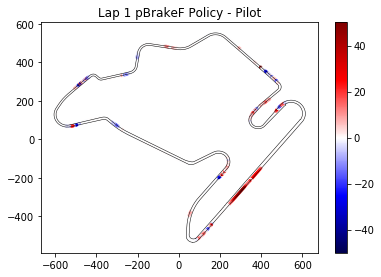

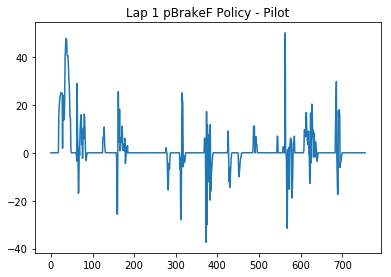

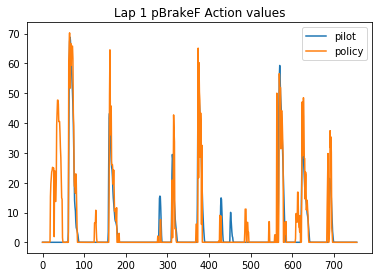

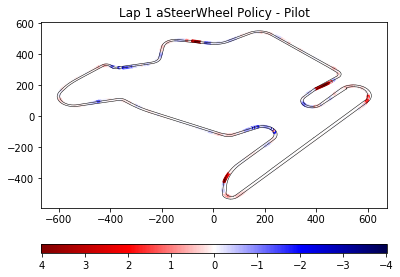

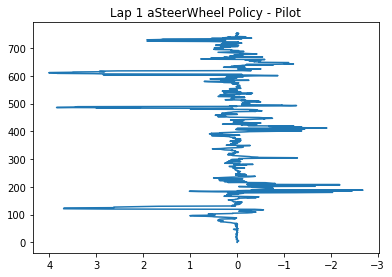

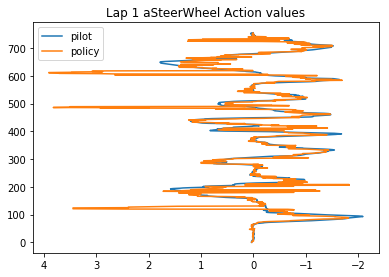

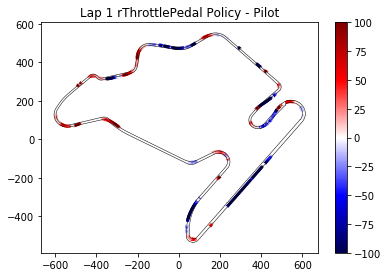

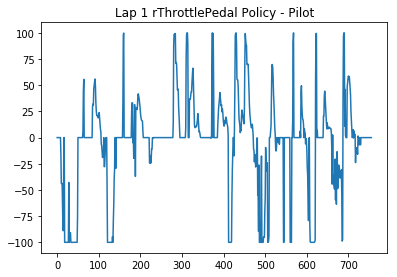

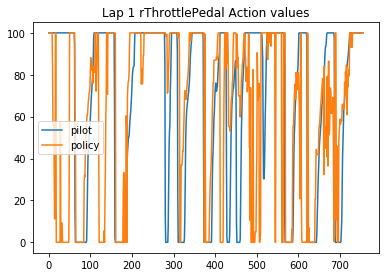

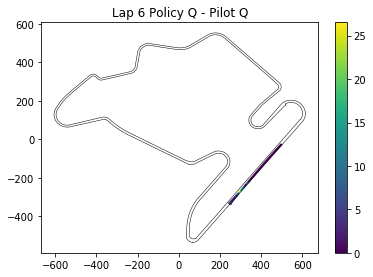

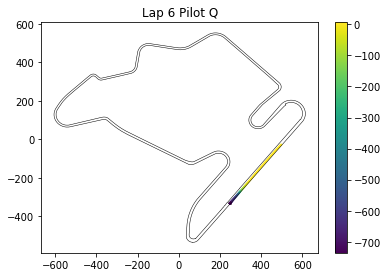

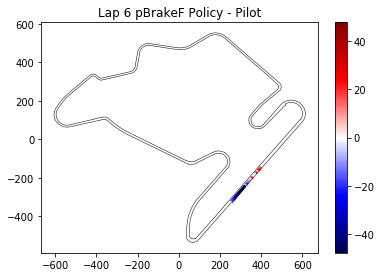

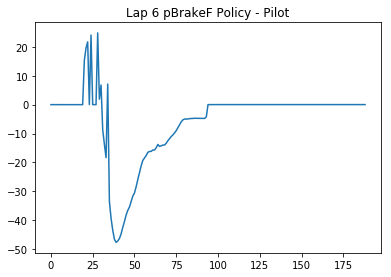

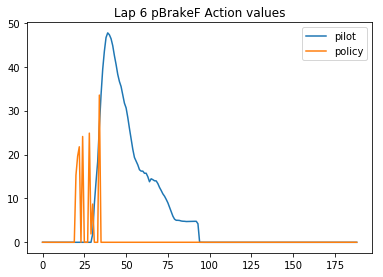

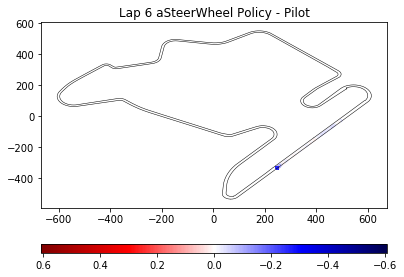

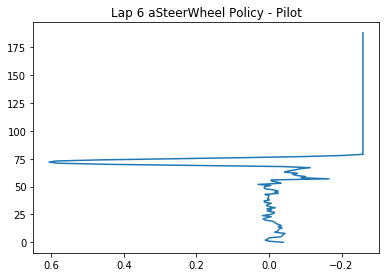

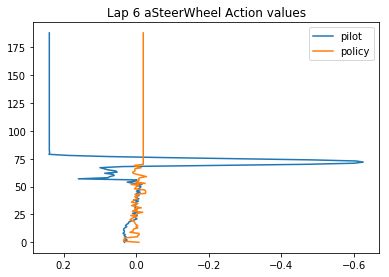

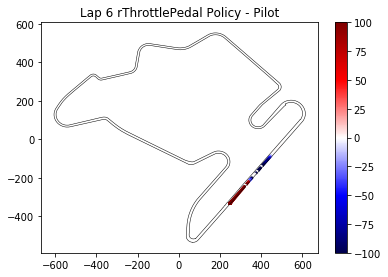

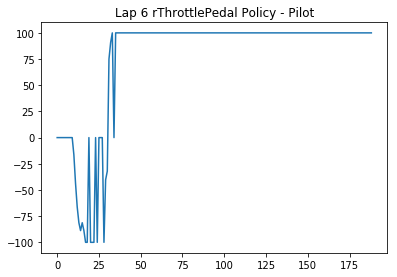

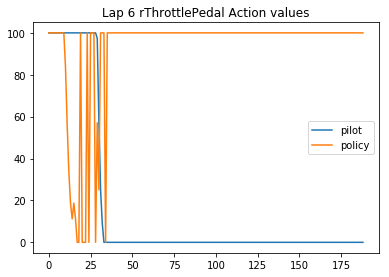

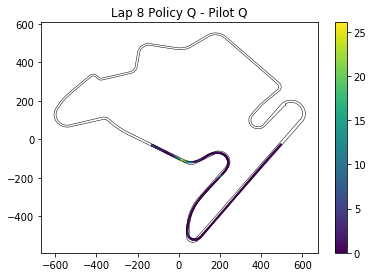

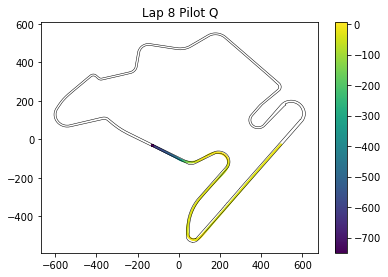

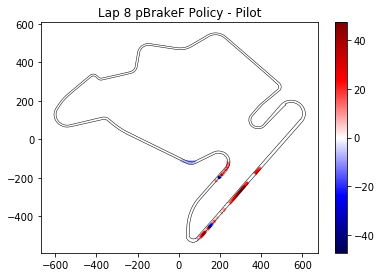

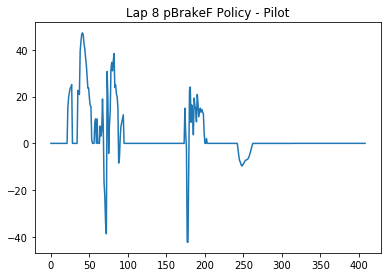

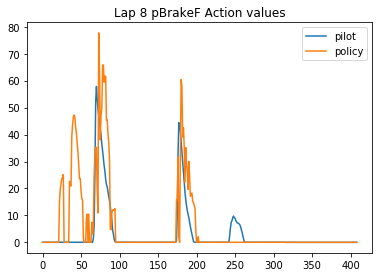

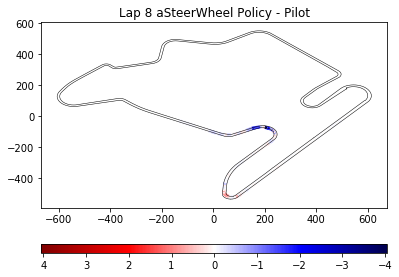

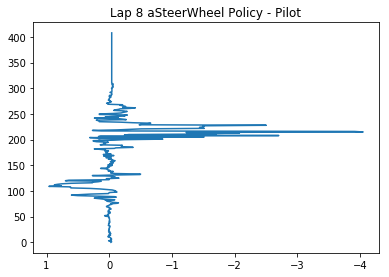

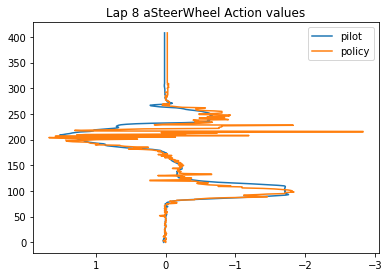

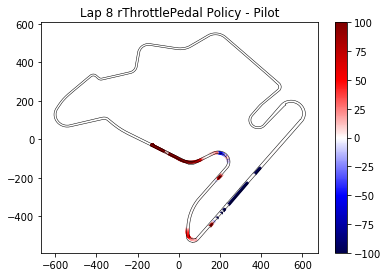

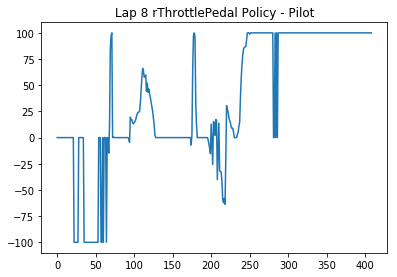

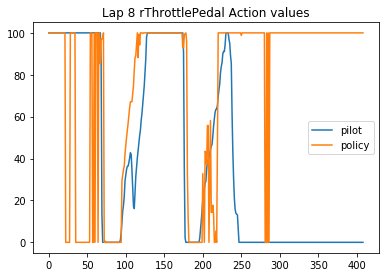

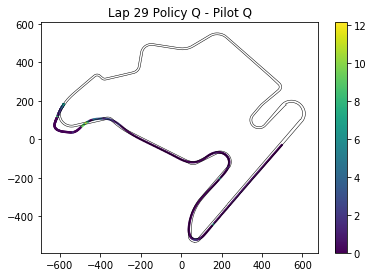

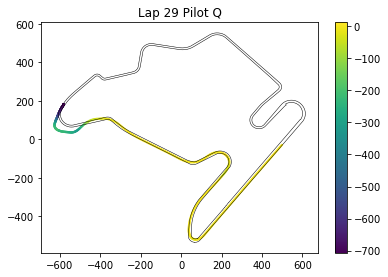

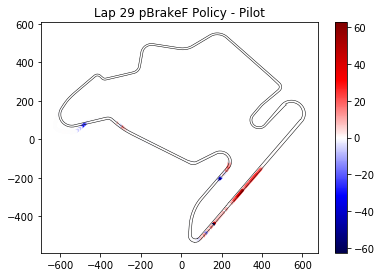

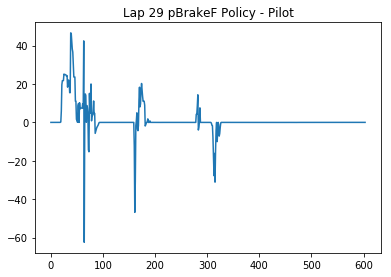

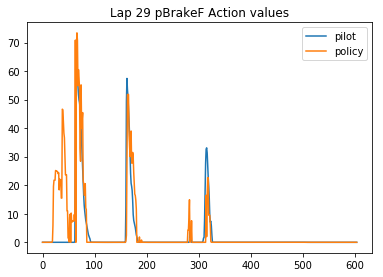

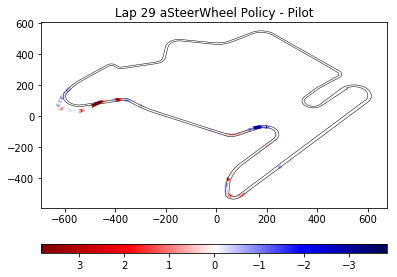

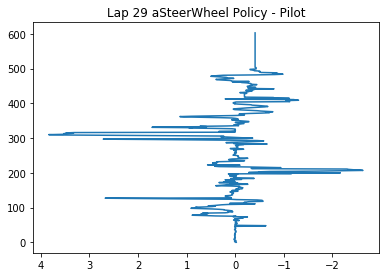

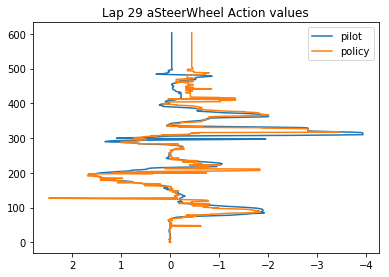

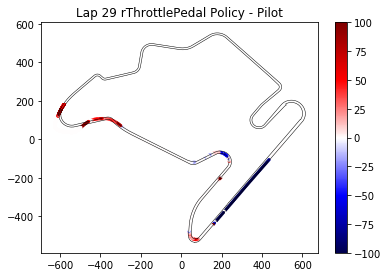

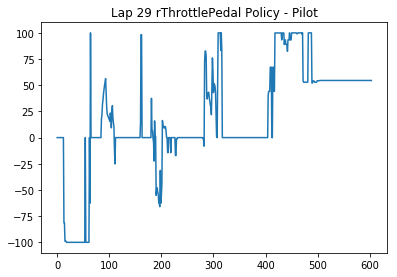

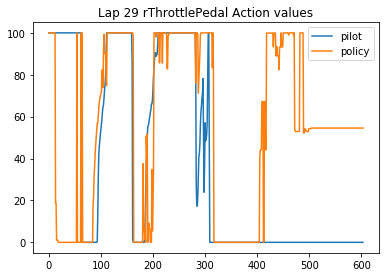

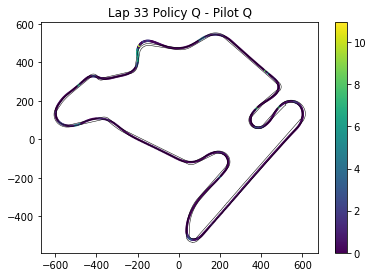

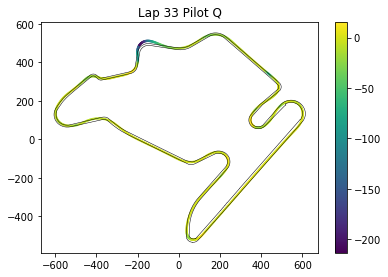

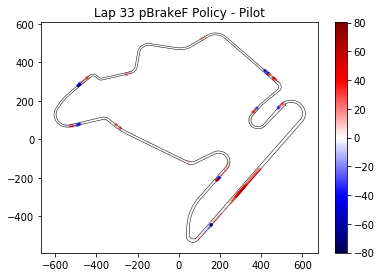

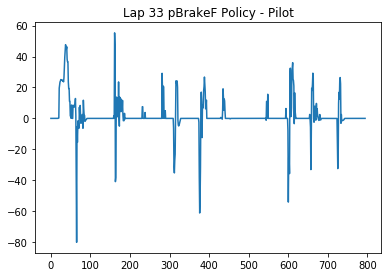

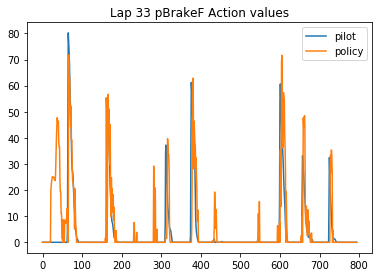

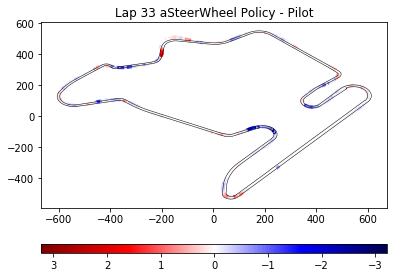

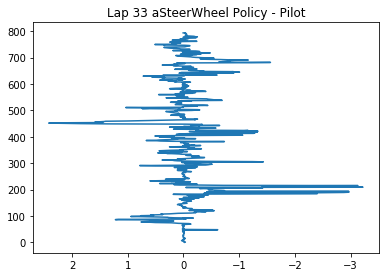

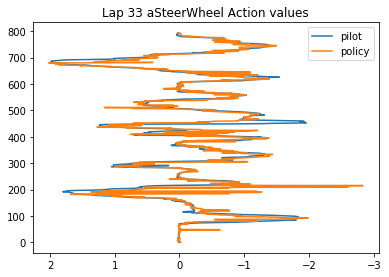

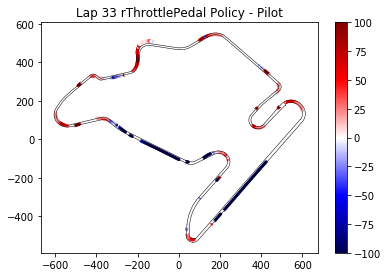

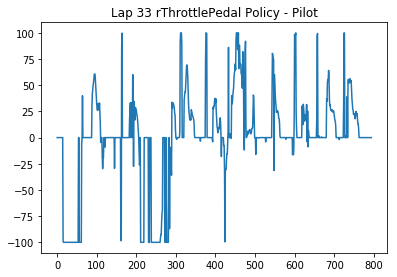

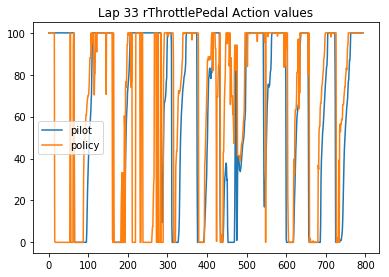

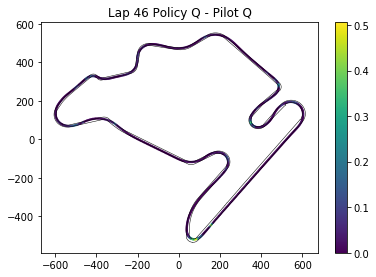

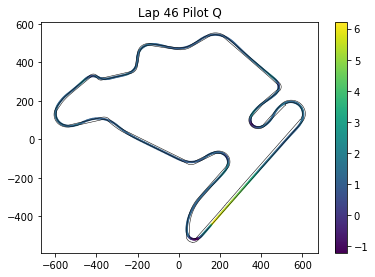

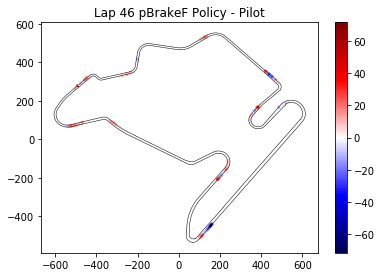

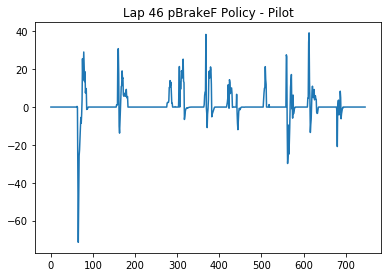

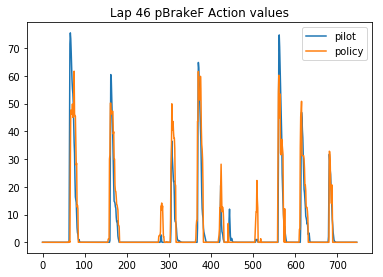

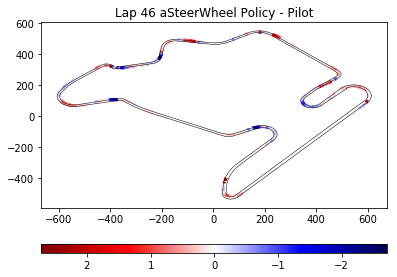

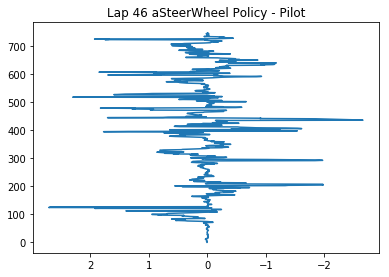

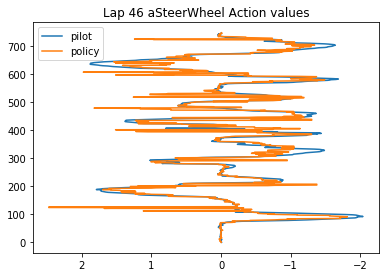

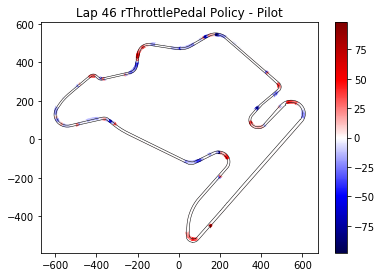

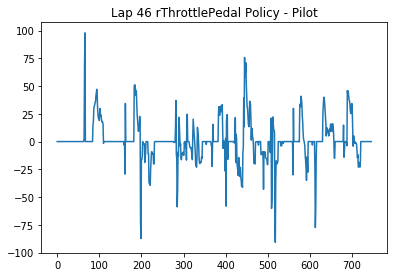

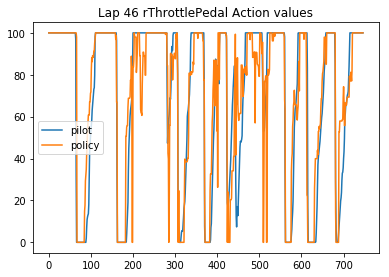

In [14]:
laps = list(evaluation_as.keys())
for lap in laps_to_analyse:
    f, ax = plot_track(track_in, track_out)
    plot_q_delta(lap, simulation, evaluation_as, f, ax)
    f, ax = plot_track(track_in, track_out)
    plot_q(lap, simulation, evaluation_as, f, ax, 'pilot')
    for i in range(len(action_cols)):
        f, ax = plot_track(track_in, track_out)
        plot_action_delta(lap, i, simulation, evaluation_as, f, ax)

## Execution time

In [15]:
with open(os.path.join(fqi_exp_path, algorithm_name_as), 'rb') as a:
    alg_as = pickle.load(a)

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [16]:
fit_time_as = alg_as._result.fit_time
maxq_time_as = alg_as._result.maxq_time
exec_time_as = alg_as._result.elapsed_time

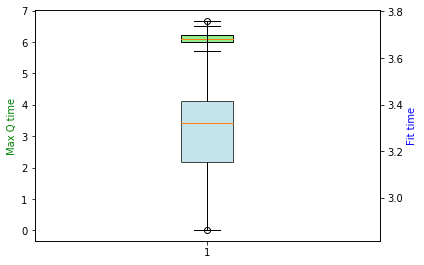

In [17]:
plot_computation_times(maxq_time_as, fit_time_as)

## ExtraTrees feature importance

In [18]:
et_A_as = alg_as._policy.Q._regressor[0]
et_B_as = alg_as._policy.Q._regressor[1]
variables_as = all_state_cols + action_cols

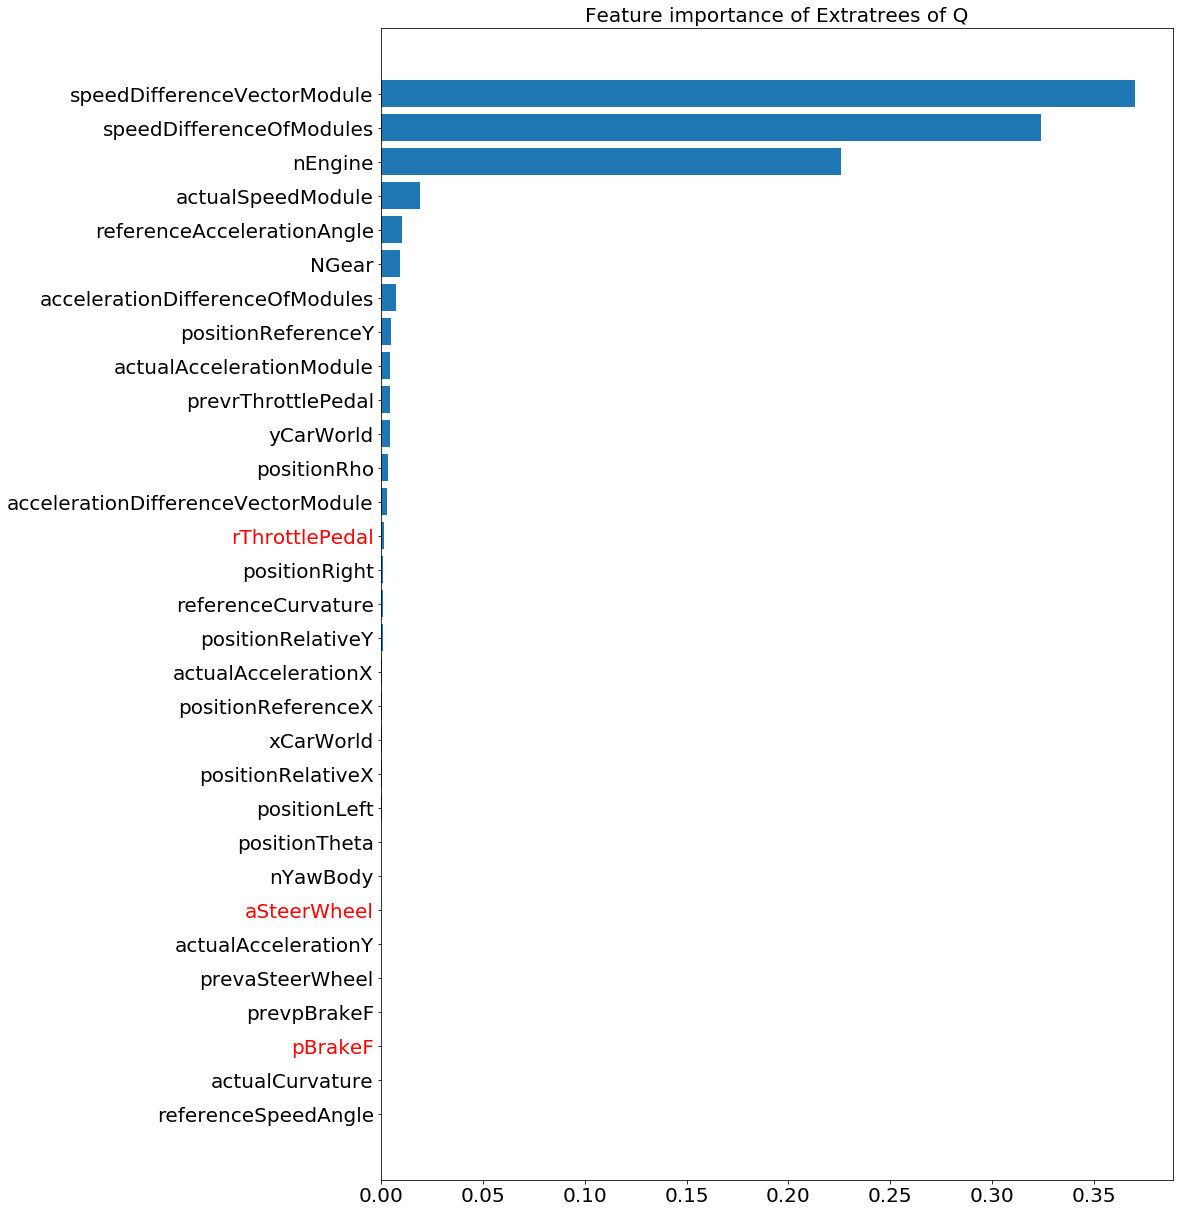

In [19]:
plot_feature_importance(variables_as, et_A_as.feature_importances_)

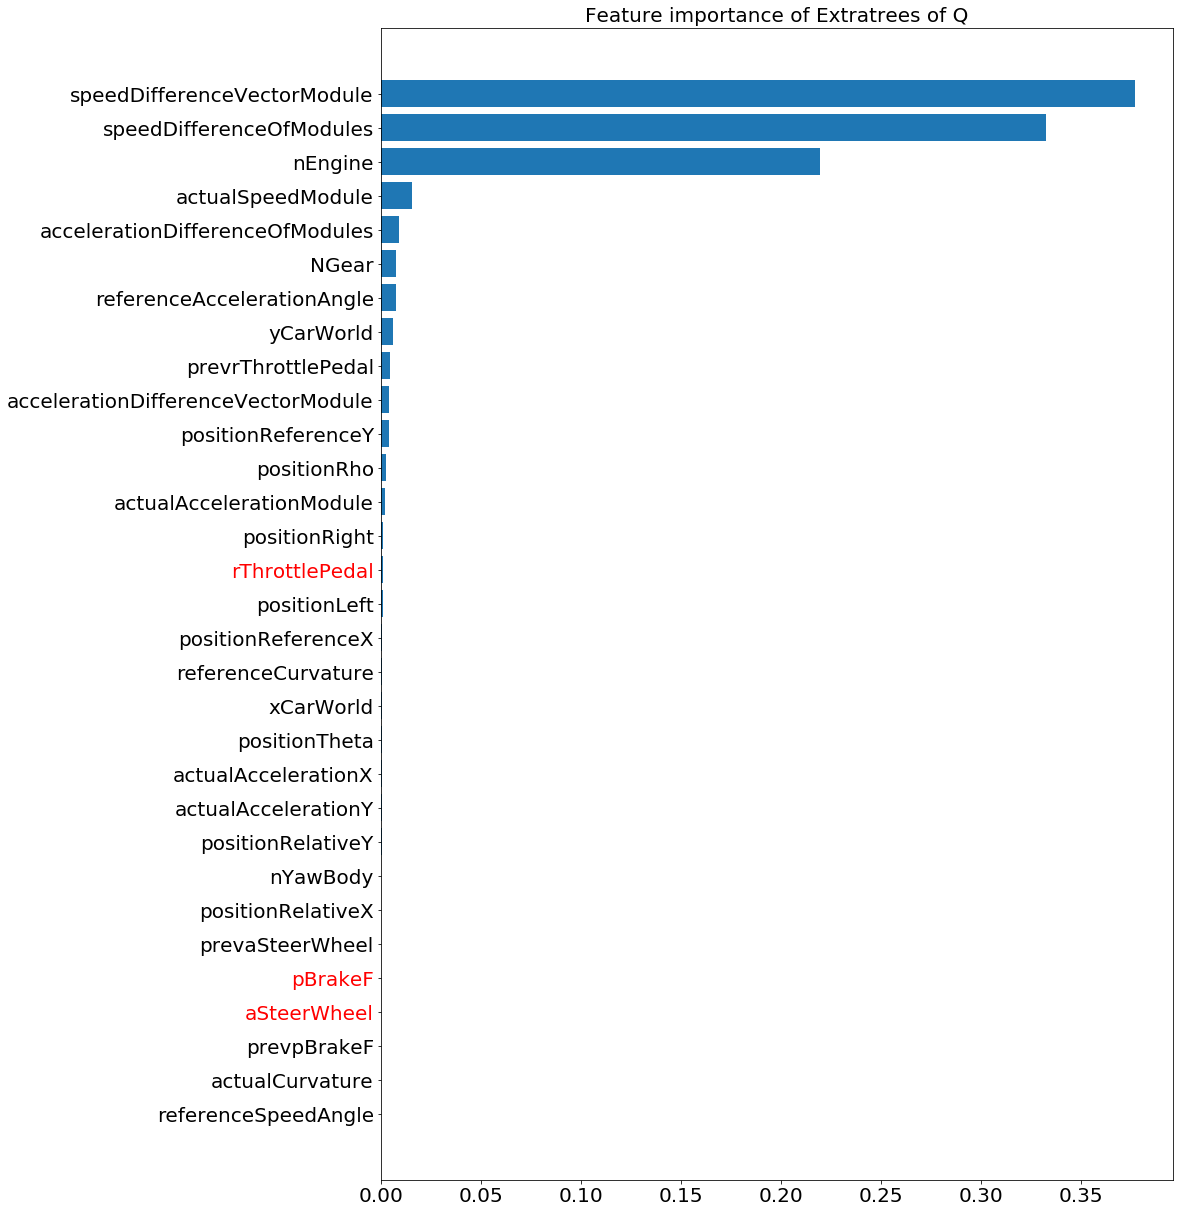

In [20]:
plot_feature_importance(variables_as, et_B_as.feature_importances_)

Text(0,0.5,'Sum of delta Q')

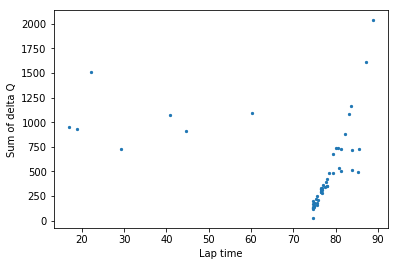

In [21]:
lap_times = [simulation['time'][simulation.NLap == lap].values[-1] for lap in set(simulation.NLap)]
delta_qs_as = [evaluation_as[lap][1] - evaluation_as[lap][0] for lap in set(simulation.NLap)]
sum_delta_qs_as = [delta.sum() for delta in delta_qs_as]
mean_delta_qs_as = [delta.mean() for delta in delta_qs_as]

f = plt.figure()
plt.scatter(lap_times, sum_delta_qs_as, s=5)
plt.xlabel('Lap time')
plt.ylabel('Sum of delta Q')

# Reduced state features

In [22]:
algorithm_name_rs = 'alg_double_fqi_last_reduced_state_nofilt.pkl'
eval_file_name_rs = 'eval_alg_double_fqi_last_reduced_state_nofilt.pkl'

In [23]:
with open(os.path.join(fqi_exp_path, eval_file_name_rs), 'rb') as e:
    evaluation_rs = pickle.load(e)

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


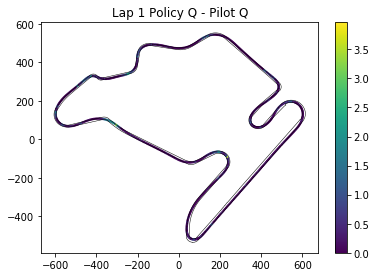

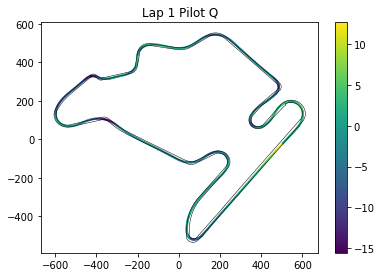

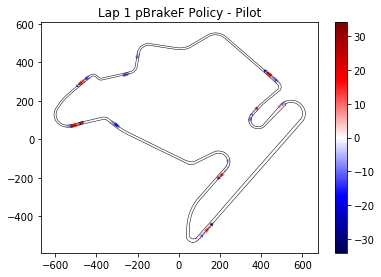

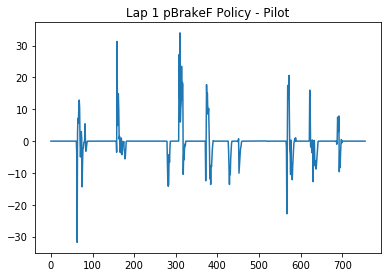

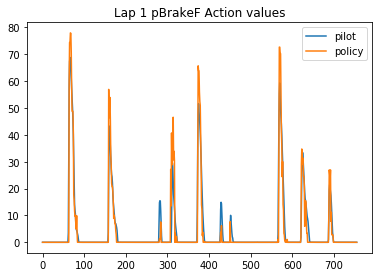

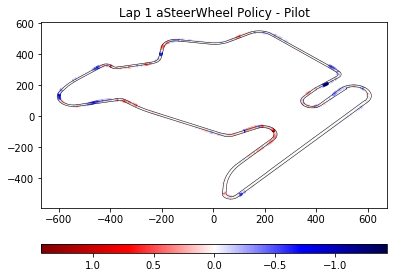

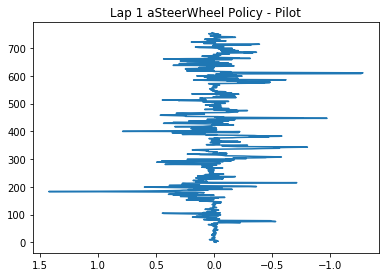

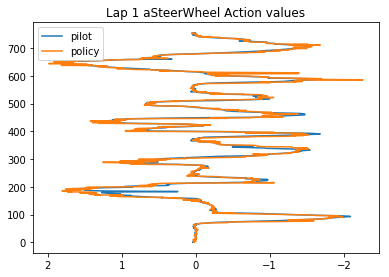

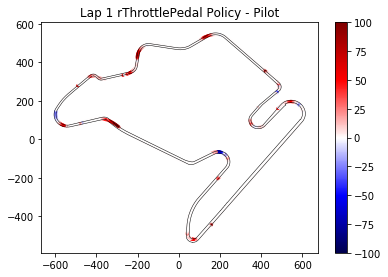

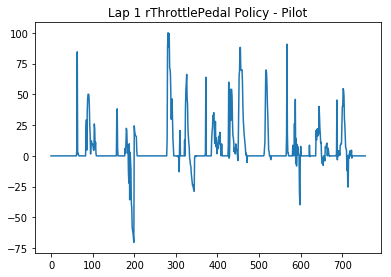

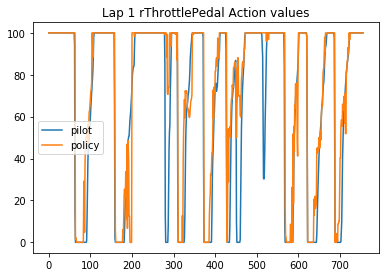

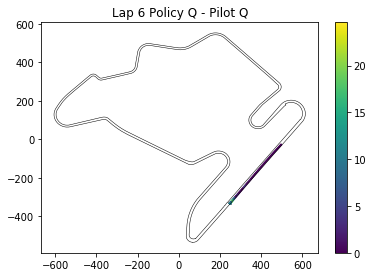

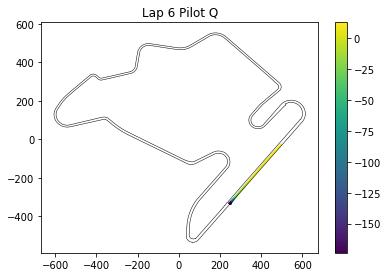

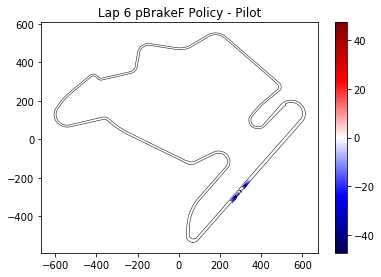

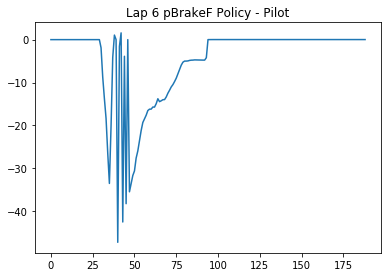

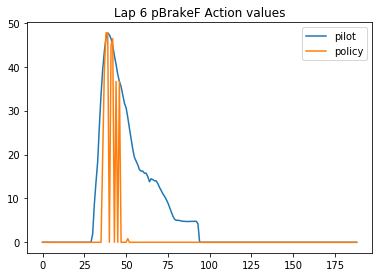

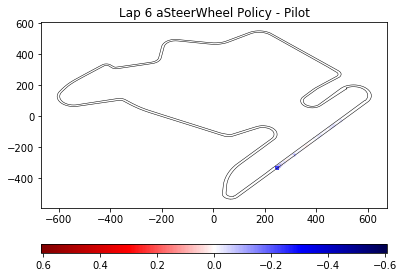

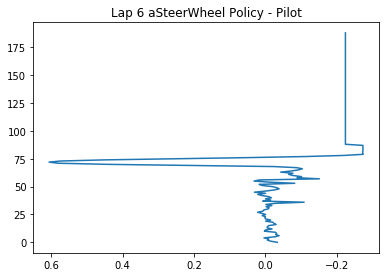

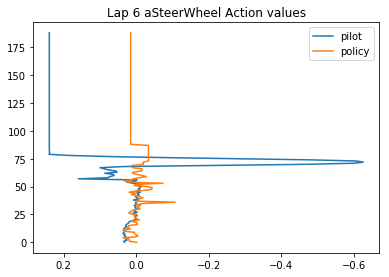

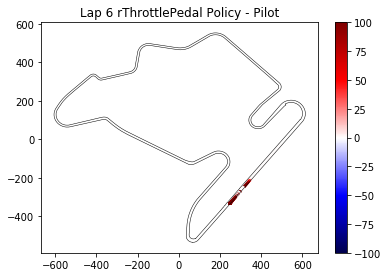

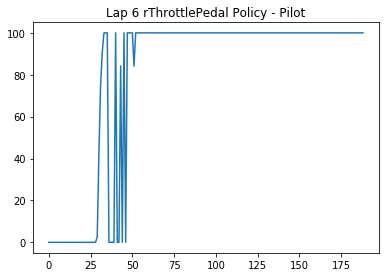

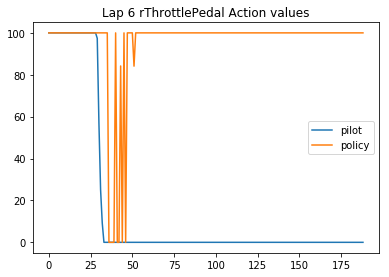

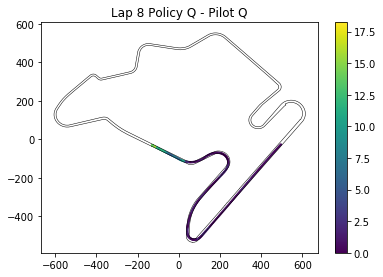

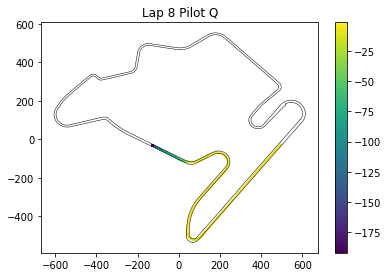

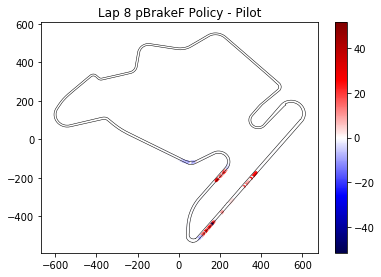

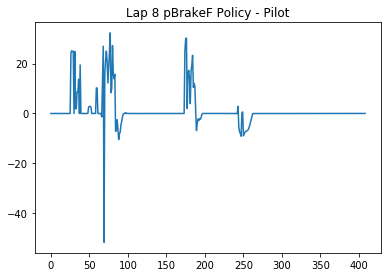

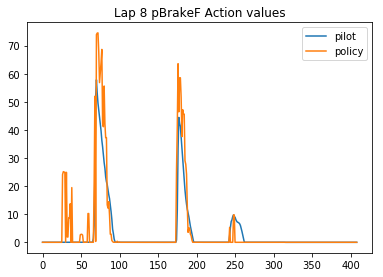

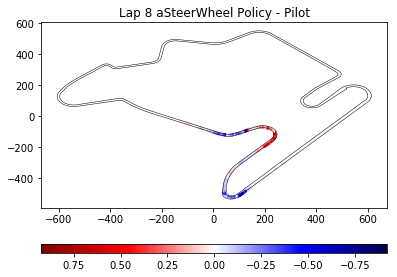

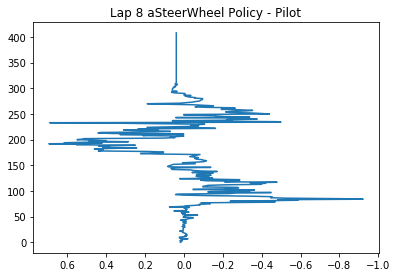

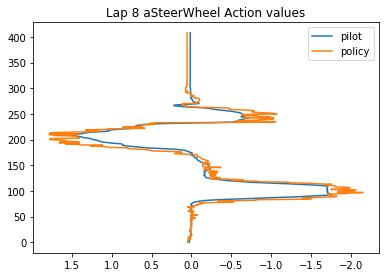

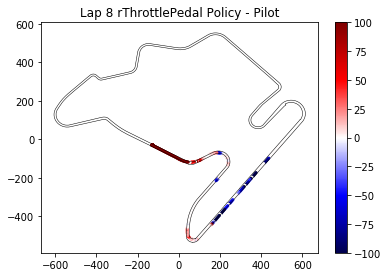

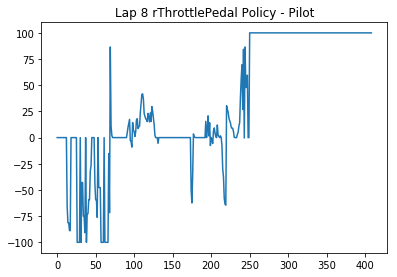

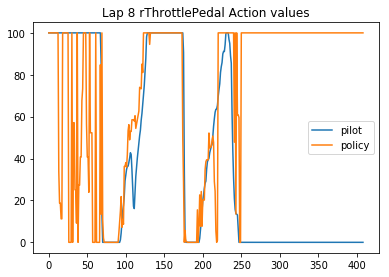

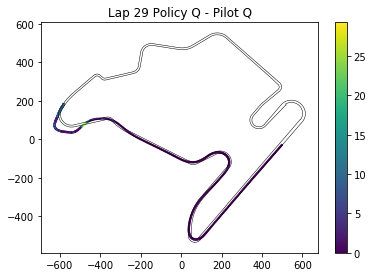

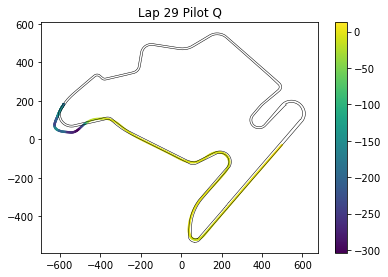

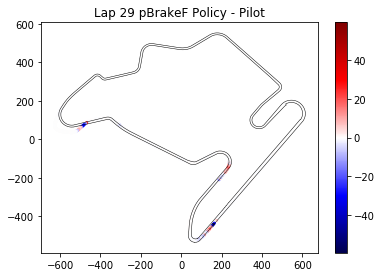

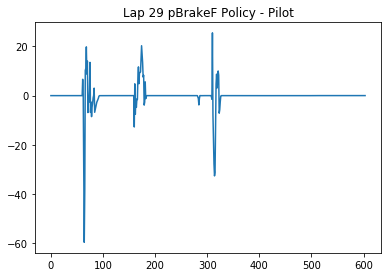

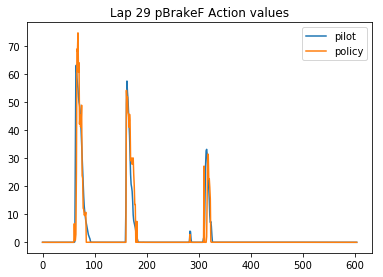

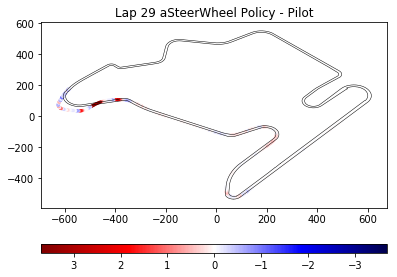

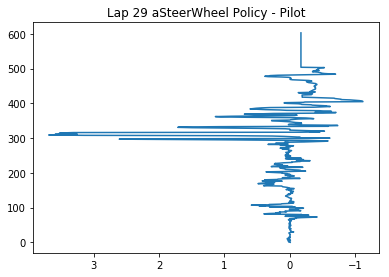

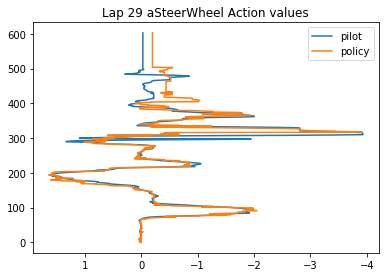

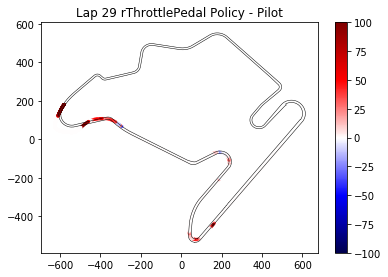

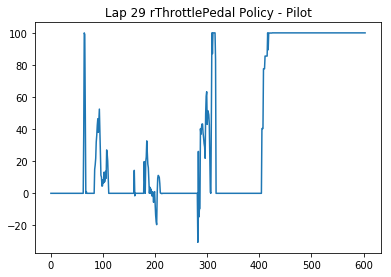

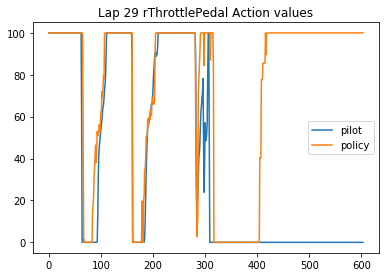

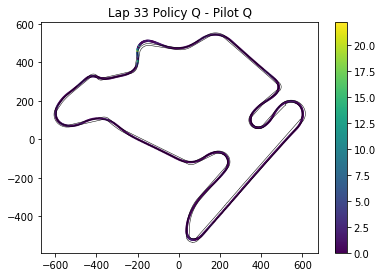

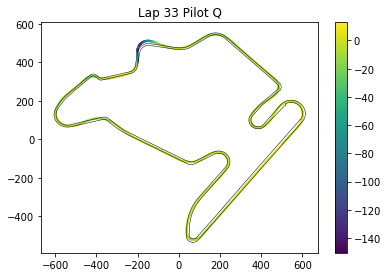

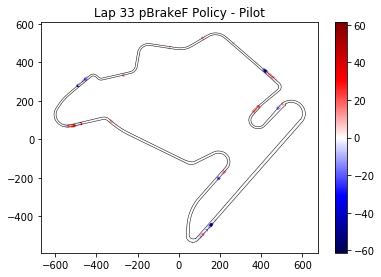

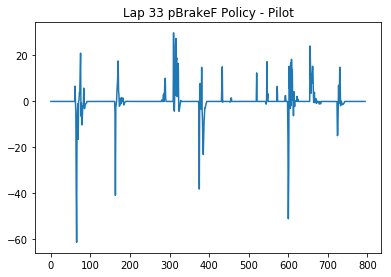

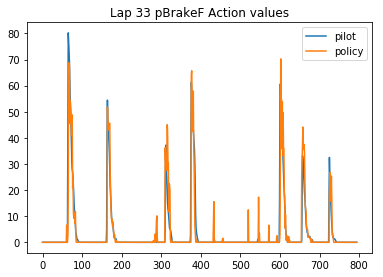

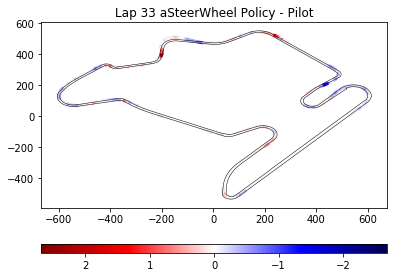

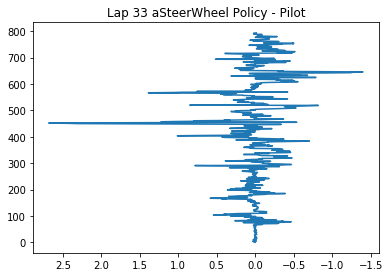

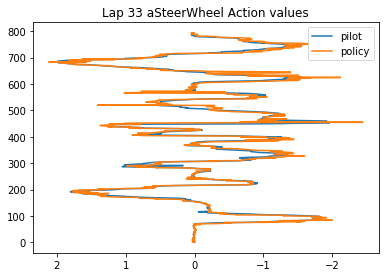

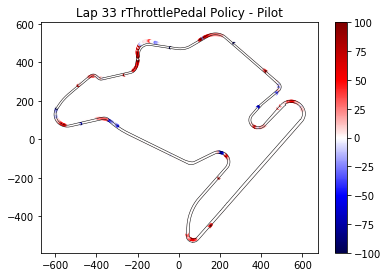

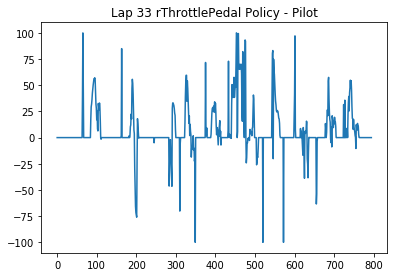

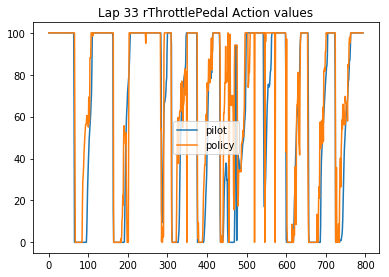

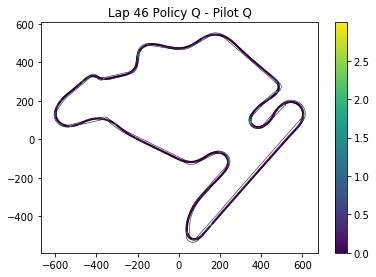

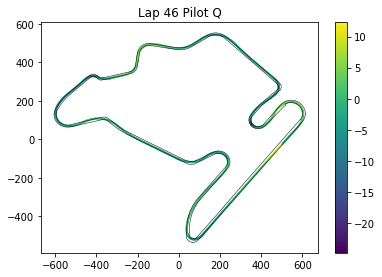

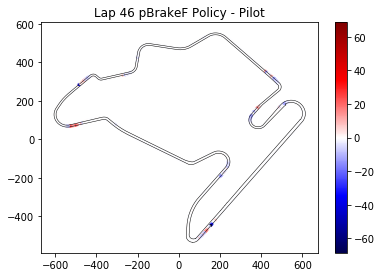

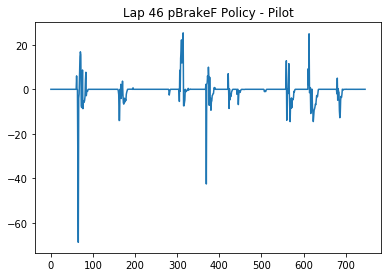

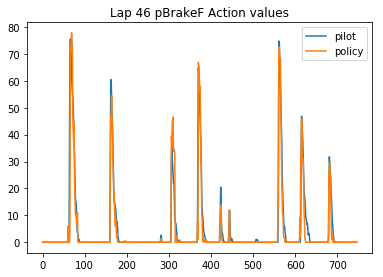

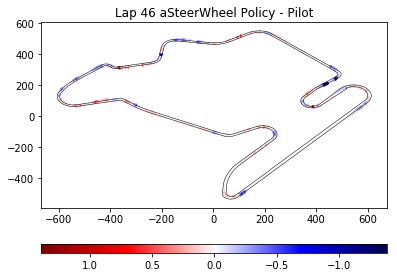

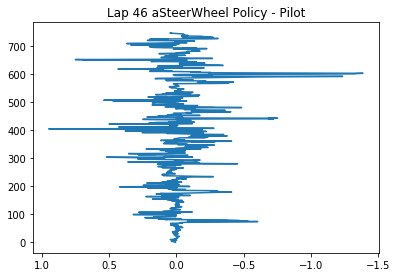

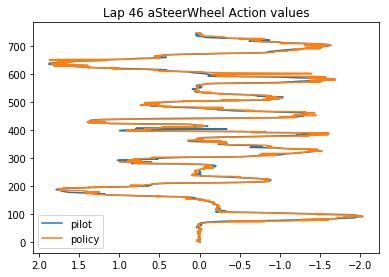

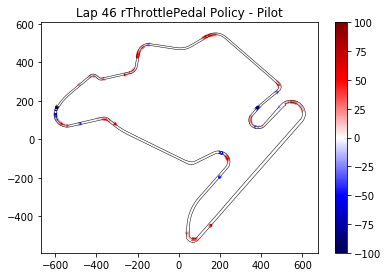

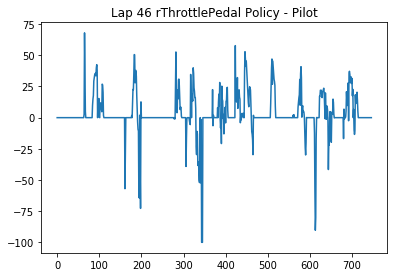

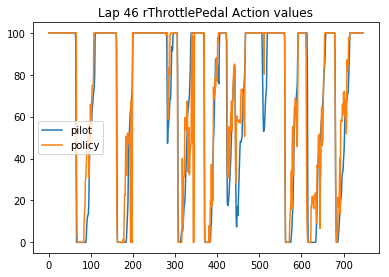

In [24]:
laps = list(evaluation_rs.keys())
for lap in laps_to_analyse:
    f, ax = plot_track(track_in, track_out)
    plot_q_delta(lap, simulation, evaluation_rs, f, ax)
    f, ax = plot_track(track_in, track_out)
    plot_q(lap, simulation, evaluation_rs, f, ax, 'pilot')
    for i in range(len(action_cols)):
        f, ax = plot_track(track_in, track_out)
        plot_action_delta(lap, i, simulation, evaluation_rs, f, ax)

## Execution time

In [25]:
with open(os.path.join(fqi_exp_path, algorithm_name_rs), 'rb') as a:
    alg_rs = pickle.load(a)

In [26]:
fit_time_rs = alg_rs._result.fit_time
maxq_time_rs = alg_rs._result.maxq_time
exec_time_rs = alg_rs._result.elapsed_time

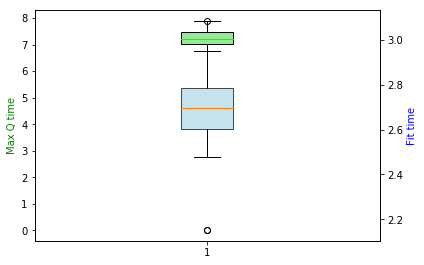

In [27]:
plot_computation_times(maxq_time_rs, fit_time_rs)

## ExtraTrees feature importance

In [28]:
et_A_rs = alg_rs._policy.Q._regressor[0]
et_B_rs = alg_rs._policy.Q._regressor[1]
variables_rs = state_cols + action_cols

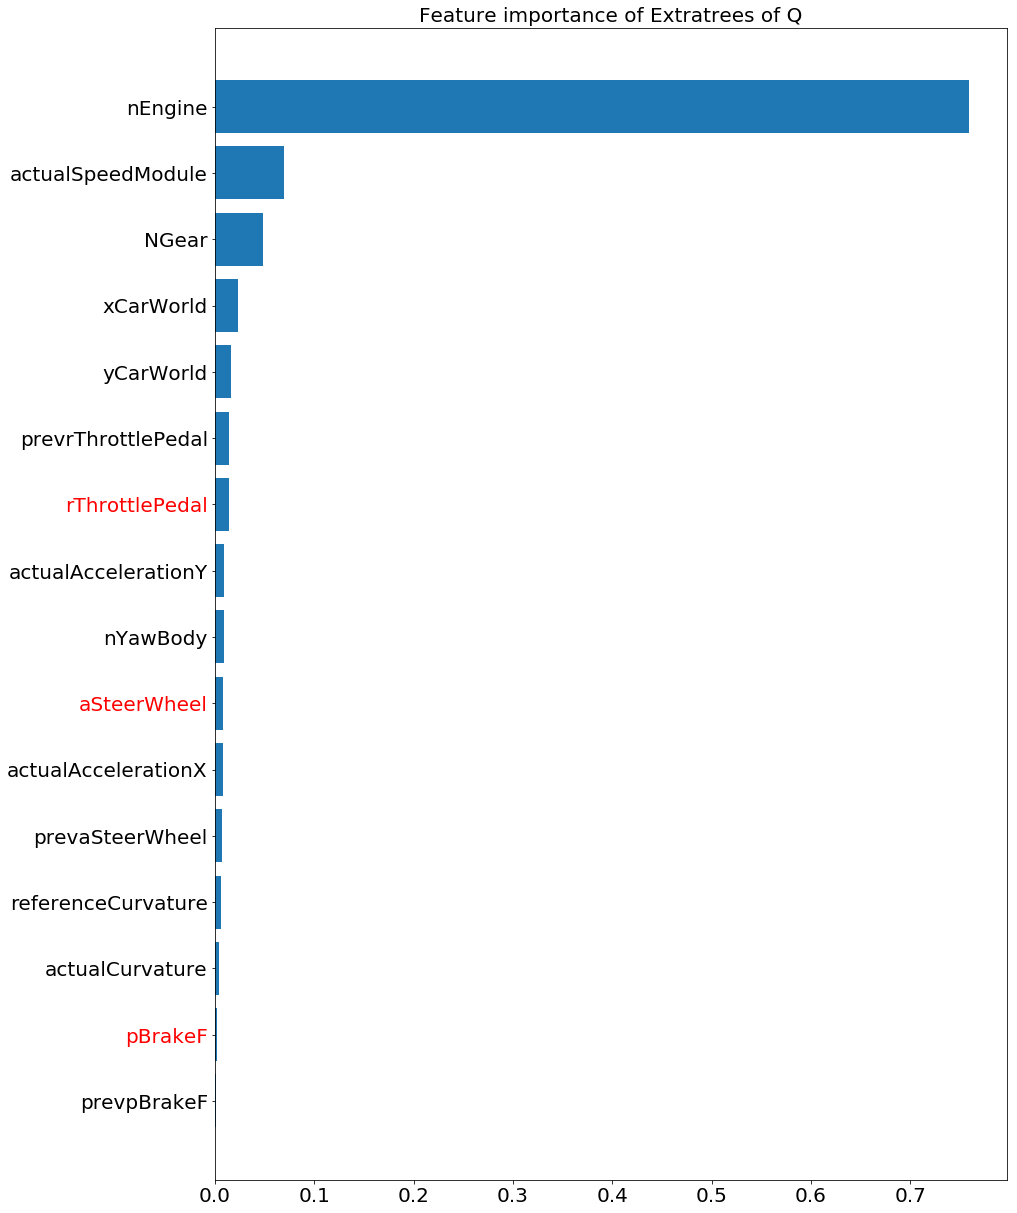

In [29]:
plot_feature_importance(variables_rs, et_A_rs.feature_importances_)

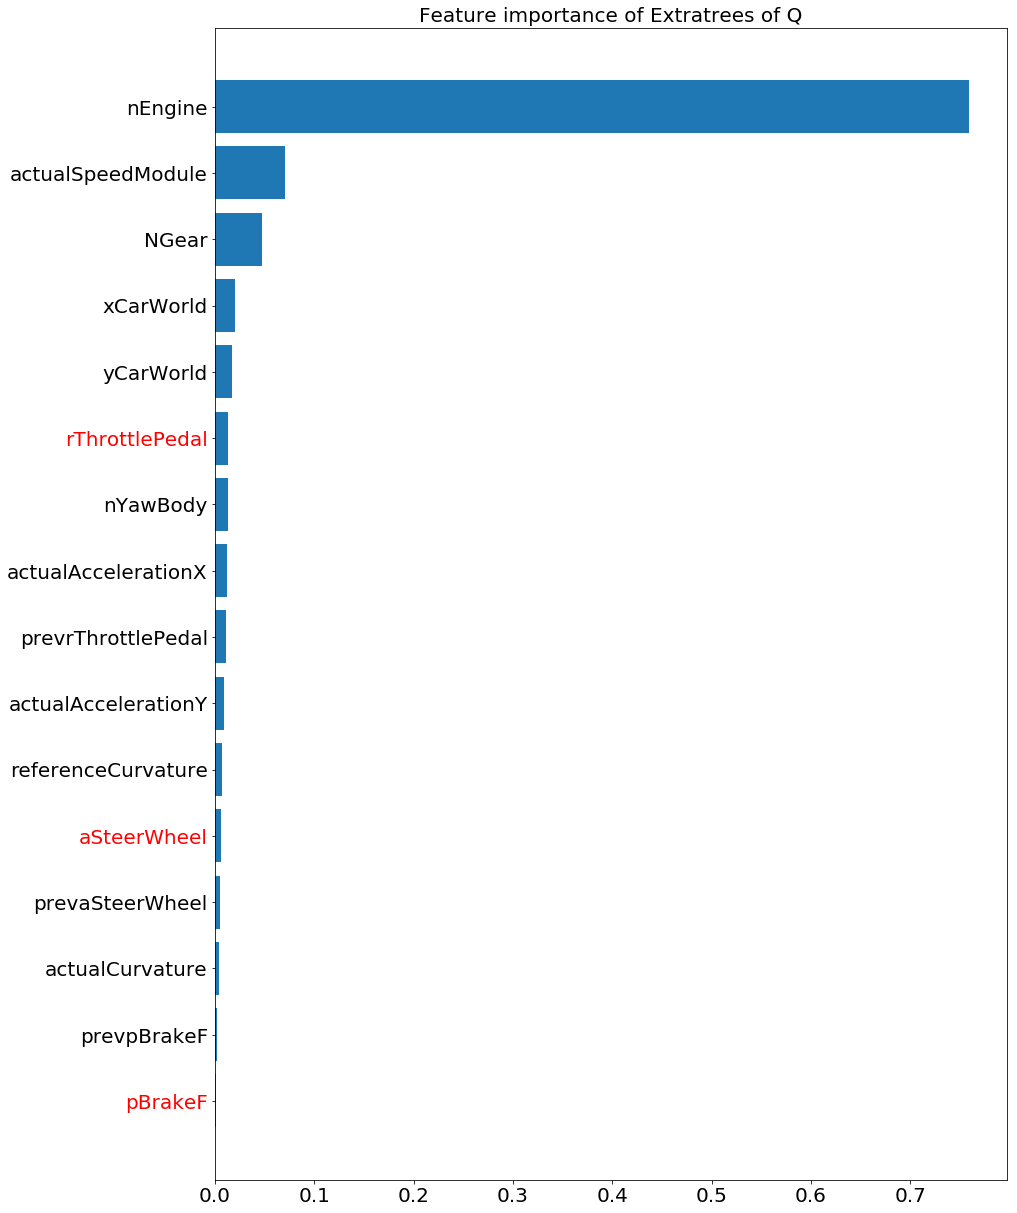

In [31]:
plot_feature_importance(variables_rs, et_B_rs.feature_importances_)

Text(0,0.5,'Sum of delta Q')

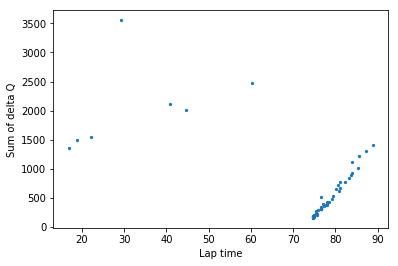

In [32]:
lap_times = [simulation['time'][simulation.NLap == lap].values[-1] for lap in set(simulation.NLap)]
delta_qs_rs = [evaluation_rs[lap][1] - evaluation_rs[lap][0] for lap in set(simulation.NLap)]
sum_delta_qs_rs = [delta.sum() for delta in delta_qs_rs]
mean_delta_qs_rs = [delta.mean() for delta in delta_qs_rs]

f = plt.figure()
plt.scatter(lap_times, sum_delta_qs_rs, s=5)
plt.xlabel('Lap time')
plt.ylabel('Sum of delta Q')